In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.DataFrame()

In [4]:
np.random.seed(42)

In [5]:
x = np.random.rand(100, 1)-0.5

In [6]:
x

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [11]:
y = 3*x[:,0]**2+0.05 * np.random.randn(100)

In [12]:
df['x'] = x.reshape(100)
df['y'] = y

In [9]:
df.head()

,x,y
0,-0.125460,0.000206
1,0.450714,-0.009111
2,0.231994,0.000741
3,0.098658,-0.002902
4,-0.343981,-0.003899


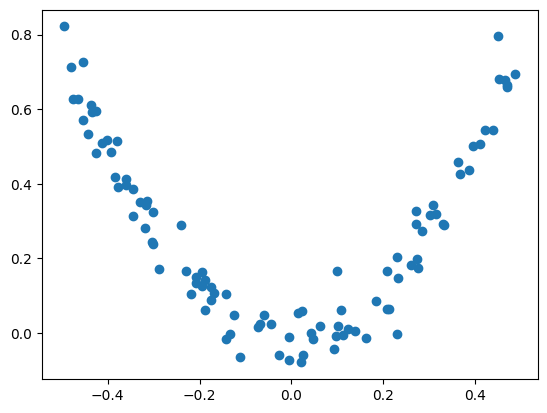

In [13]:
plt.scatter(df['x'], df['y'])

In [14]:
df['pred1(base model)'] = df['y'].mean()

In [15]:
df

,x,y,pred1(base model)
0,-0.125460,0.047871,0.267356
1,0.450714,0.682107,0.267356
2,0.231994,0.148231,0.267356
3,0.098658,0.165209,0.267356
4,-0.343981,0.386253,0.267356
...,...,...,...
95,-0.006204,-0.071678,0.267356
96,0.022733,0.059709,0.267356
97,-0.072459,0.016263,0.267356
98,-0.474581,0.626606,0.267356


In [16]:
df['residual1'] = df['y']-df['pred1(base model)']

In [17]:
df

,x,y,pred1(base model),residual1
0,-0.125460,0.047871,0.267356,-0.219485
1,0.450714,0.682107,0.267356,0.414751
2,0.231994,0.148231,0.267356,-0.119125
3,0.098658,0.165209,0.267356,-0.102147
4,-0.343981,0.386253,0.267356,0.118897
...,...,...,...,...
95,-0.006204,-0.071678,0.267356,-0.339034
96,0.022733,0.059709,0.267356,-0.207648
97,-0.072459,0.016263,0.267356,-0.251094
98,-0.474581,0.626606,0.267356,0.359249


In [18]:
x = df['x'].values.reshape(100,1)
y = df['residual1']

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
clf1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [21]:
clf1.fit(x,y)

DecisionTreeRegressor(max_leaf_nodes=8)

In [23]:
df['pred2'] = clf1.predict(x)

In [24]:
df

,x,y,pred1(base model),residual1,pred2
0,-0.125460,0.047871,0.267356,-0.219485,-0.243115
1,0.450714,0.682107,0.267356,0.414751,0.428681
2,0.231994,0.148231,0.267356,-0.119125,-0.243115
3,0.098658,0.165209,0.267356,-0.102147,-0.243115
4,-0.343981,0.386253,0.267356,0.118897,0.032549
...,...,...,...,...,...
95,-0.006204,-0.071678,0.267356,-0.339034,-0.243115
96,0.022733,0.059709,0.267356,-0.207648,-0.243115
97,-0.072459,0.016263,0.267356,-0.251094,-0.243115
98,-0.474581,0.626606,0.267356,0.359249,0.374375


In [25]:
base = df['pred1(base model)']

In [27]:
learning_rate = 0.1

In [28]:
df['residual2'] = df['y']-base+learning_rate*df['pred2']

In [29]:
df

,x,y,pred1(base model),residual1,pred2,residual2
0,-0.125460,0.047871,0.267356,-0.219485,-0.243115,-0.243797
1,0.450714,0.682107,0.267356,0.414751,0.428681,0.457619
2,0.231994,0.148231,0.267356,-0.119125,-0.243115,-0.143437
3,0.098658,0.165209,0.267356,-0.102147,-0.243115,-0.126459
4,-0.343981,0.386253,0.267356,0.118897,0.032549,0.122152
...,...,...,...,...,...,...
95,-0.006204,-0.071678,0.267356,-0.339034,-0.243115,-0.363345
96,0.022733,0.059709,0.267356,-0.207648,-0.243115,-0.231959
97,-0.072459,0.016263,0.267356,-0.251094,-0.243115,-0.275405
98,-0.474581,0.626606,0.267356,0.359249,0.374375,0.396687


In [32]:
x = df['x'].values.reshape(100,1)
y = df['y']

In [33]:
clf2 = DecisionTreeRegressor(max_leaf_nodes=32)

In [34]:
clf2.fit(x,y)

DecisionTreeRegressor(max_leaf_nodes=32)

In [35]:
df['pred3'] = clf2.predict(x)

In [36]:
df

,x,y,pred1(base model),residual1,pred2,residual2,pred3
0,-0.125460,0.047871,0.267356,-0.219485,-0.243115,-0.243797,0.009476
1,0.450714,0.682107,0.267356,0.414751,0.428681,0.457619,0.675818
2,0.231994,0.148231,0.267356,-0.119125,-0.243115,-0.143437,0.148231
3,0.098658,0.165209,0.267356,-0.102147,-0.243115,-0.126459,0.165209
4,-0.343981,0.386253,0.267356,0.118897,0.032549,0.122152,0.337844
...,...,...,...,...,...,...,...
95,-0.006204,-0.071678,0.267356,-0.339034,-0.243115,-0.363345,-0.065875
96,0.022733,0.059709,0.267356,-0.207648,-0.243115,-0.231959,-0.008919
97,-0.072459,0.016263,0.267356,-0.251094,-0.243115,-0.275405,0.027797
98,-0.474581,0.626606,0.267356,0.359249,0.374375,0.396687,0.626360


In [37]:
df['residual3'] = df['y']-base+learning_rate*df['pred2']+learning_rate*df['pred3']

In [38]:
df

,x,y,pred1(base model),residual1,pred2,residual2,pred3,residual3
0,-0.125460,0.047871,0.267356,-0.219485,-0.243115,-0.243797,0.009476,-0.242849
1,0.450714,0.682107,0.267356,0.414751,0.428681,0.457619,0.675818,0.525201
2,0.231994,0.148231,0.267356,-0.119125,-0.243115,-0.143437,0.148231,-0.128614
3,0.098658,0.165209,0.267356,-0.102147,-0.243115,-0.126459,0.165209,-0.109938
4,-0.343981,0.386253,0.267356,0.118897,0.032549,0.122152,0.337844,0.155936
...,...,...,...,...,...,...,...,...
95,-0.006204,-0.071678,0.267356,-0.339034,-0.243115,-0.363345,-0.065875,-0.369933
96,0.022733,0.059709,0.267356,-0.207648,-0.243115,-0.231959,-0.008919,-0.232851
97,-0.072459,0.016263,0.267356,-0.251094,-0.243115,-0.275405,0.027797,-0.272625
98,-0.474581,0.626606,0.267356,0.359249,0.374375,0.396687,0.626360,0.459323


# final_prediction = base_model + (alpha*m1) + (aplha*m2).........

In [39]:
x

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [41]:
query = [[0.45071431]]

In [43]:
pred1 = clf1.predict(query)

In [44]:
pred2 = clf2.predict(query)

In [47]:
final_prediction = base[0] + (learning_rate*pred1) + (learning_rate*pred2)

In [48]:
final_prediction

array([0.37780597])